In [25]:
from Initial_module_load import *
model_update('model_parameters_base_DSPL_mock1')# YOU CAN MAKE ADDITIONAL VERSIONS OF THE PARAMETER MODULE AND SWITCH BETWEEN THEM HERE
# e.g. model_update('model_parameters_base_DSPL_mock2')

✅ Model parameters reloaded successfully from model_parameters_base_DSPL_mock1!
CURRENT MODEL PARAMETERS
Lens center: (0.030000, -0.140404)
Redshifts - Lens: 0.45, Source 1: 2.518, Source 2: 2.518
Einstein radius: 4.0000
❌ Error reloading parameters: 'gamma1'
✅ Model configurations built successfully!
📊 Model includes:
   - Lens models: 2 (SIE, SHEAR_GAMMA_PSI)
   - Source models: 2 (SERSIC_ELLIPSE, SERSIC_ELLIPSE)
   - Lens light models: 1 (SERSIC_ELLIPSE)
   - Multi-plane: True
   - Redshifts: z_l=0.45, z_s1=2.518, z_s2=2.518

🔍 Quick parameter check:
   - Einstein radius: 4.0000
   - Lens center: (-0.040000, -0.300000)
   - Shear: gamma_ext=0.1192, psi_ext=0.5038

🔄 Run this cell/function anytime to reload parameters from your parameter module


In [26]:
# We import the data and PSF for the mock image
kwargs_data_F200LP, kwargs_psf_F200LP = import_data_mock('../tutorials_DB_2025_09/mocks/images/mock_1_image.fits',
                                                    '../tutorials_DB_2025_09/mocks/PSF/mock_psf.fits')

model_update('model_parameters_base_DSPL_mock1') # Here I have already found ideal initial parameters for the DSPL mock1 case from my previous tests


✅ Model parameters reloaded successfully from model_parameters_base_DSPL_mock1!
CURRENT MODEL PARAMETERS
Lens center: (0.030000, -0.140404)
Redshifts - Lens: 0.45, Source 1: 2.518, Source 2: 2.518
Einstein radius: 4.0000
❌ Error reloading parameters: 'gamma1'
✅ Model configurations built successfully!
📊 Model includes:
   - Lens models: 2 (SIE, SHEAR_GAMMA_PSI)
   - Source models: 2 (SERSIC_ELLIPSE, SERSIC_ELLIPSE)
   - Lens light models: 1 (SERSIC_ELLIPSE)
   - Multi-plane: True
   - Redshifts: z_l=0.45, z_s1=2.518, z_s2=2.518

🔍 Quick parameter check:
   - Einstein radius: 4.0000
   - Lens center: (-0.040000, -0.300000)
   - Shear: gamma_ext=0.1192, psi_ext=0.5038

🔄 Run this cell/function anytime to reload parameters from your parameter module


/Users/rosador/Documents/AGEL/lenstronomy_AGEL_modules/mocks_introductory_notebooks/Initial_module_load.py:248: RuntimeWarning: invalid value encountered in log10
  ax.matshow(np.log10(data), origin='lower', cmap=cmap, vmin=-3.8, vmax=0.5)


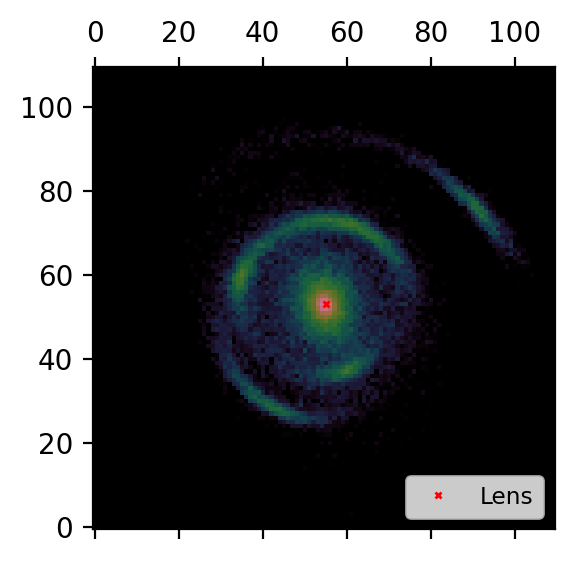

In [27]:
mock_observable_params_plot(kwargs_data_F200LP, kwargs_psf_F200LP)

In [28]:
# Now I'm ready to run the model fitting sequence on the cluster and create the file I need to submit the job
job_name = 'PSO_double_source_test_mock1'

cluster_comp = True

sampling_inputs = setup_prior_to_sampling(kwargs_data_F200LP, kwargs_psf_F200LP)

# Define the fitting sequences to be run on the cluster, either a PSO or MCMC

fitting_kwargs_list = [#['update_settings', {'kwargs_likelihood': {'bands_compute': [True, True]}}],
                       #['PSO', {'sigma_scale': 10, 'n_particles': 220, 'n_iterations': 3000}],
                       
                       #['PSO', {'sigma_scale': 5, 'n_particles': 100, 'n_iterations': 300}],
                       ['PSO', {'sigma_scale': 5, 'n_particles': 100, 'n_iterations': 300}],

                       #['PSO', {'sigma_scale': 0.5, 'n_particles': 220, 'n_iterations': 2000}],
                       #['PSO', {'sigma_scale': 0.1, 'n_particles': 220, 'n_iterations': 2000}],
                       #['MCMC', {'n_burn': 100, 'n_run': 3000, 'walkerRatio': 6, 'sigma_scale': 0.5}]
                       ]

#Create and save the file to be submitted to the cluster
configure_model_and_run(job_name, sampling_inputs, cluster_compute=cluster_comp, 
                fitting_kwargs_list=fitting_kwargs_list, kwargs_params=kwargs_params)


Number of source models: 2
Selected Cluster Compute. Preparing input file for cluster...
Must run job on cluster with job file PSO_double_source_test_mock1


In [ ]:
# Load in the output from the cluster run


job_name_out = job_name+'_out.txt'  # 'DCLS0353_double_source_F200LP_V18_run_07_out.txt'

output_temp = os.path.join(base_path, 'local_temp', job_name_out)
  
f = open(output_temp, 'rb')
[input_, output_] = joblib.load(f)
f.close()

fitting_kwargs_list, multi_band_list, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params, init_samples = input_

kwargs_result, multi_band_list_out, fit_output, _ = output_



In [ ]:
output_plot_model_fit(kwargs_data_F200LP, multi_band_list_out, kwargs_model, kwargs_result)